In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import feather
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("Iowa_Liquor_Sales.csv")

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-24071700025,12/20/2019,4252,Fareway Stores #840 / Monticello,433 N Farley St,Monticello,52310.0,POINT (-91.191385 42.241939),53.0,JONES,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,86670,Jack Daniels Tennessee Honey,12,750,15.57,23.36,3,70.08,2.25,0.59
1,INV-24089200003,12/20/2019,4541,Casey's General Store #1045 / Delmar,502 Market,Delmar,52037.0,POINT (-90.606669 42.003648),23.0,CLINTON,1011100.0,Blended Whiskies,260.0,DIAGEO AMERICAS,25606,Seagrams 7 Crown,12,750,7.50,11.25,6,67.50,4.50,1.18
2,INV-24107200133,12/23/2019,2508,Hy-Vee Food Store #1 / Cedar Rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405.0,POINT (-91.697941 41.97447),57.0,LINN,1041100.0,American Dry Gins,370.0,PERNOD RICARD USA,32236,Seagrams Extra Dry Gin,12,750,6.49,9.74,12,116.88,9.00,2.37
3,INV-24090200052,12/20/2019,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26826,Jack Daniels Old #7 Black Label,12,750,15.57,23.36,12,280.32,9.00,2.37
4,INV-24074100018,12/20/2019,5660,North Side Liquor & Tobacco / Dubuque,2013 Central Ave,Dubuque,52001.0,POINT (-90.670151 42.5116),31.0,DUBUQUE,1052100.0,Imported Brandies,389.0,REMY COINTREAU USA INC,49185,Remy Martin VSOP Flask,12,375,11.82,17.73,24,425.52,9.00,2.37


# Changing Dtype

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23563860 entries, 0 to 23563859
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Lit

In [24]:
numcol = ["Store Number", "Zip Code", "County Number", "Category", 
          "Vendor Number", "Item Number", "Pack", "Bottle Volume (ml)", "State Bottle Cost", "State Bottle Retail",
         "Bottles Sold", "Sale (Dollars)", "Volume Sold (Liters)", "Volume Sold (Gallons)"]

datecols = ["Date"]

unsure = ["Invoice/Item Number"]

catcol = []

In [36]:
#change object -> date format
for i in datecols:
    df[i] =  pd.to_datetime(df[i], format="%m/%d/%Y")

In [32]:
#change object -> numeric
#Using errors='coerce'. It will replace all non-numeric values with NaN.

for i in numcol:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [17]:
#maybe leave as is
df["Invoice/Item Number"].unique()

array(['INV-24071700025', 'INV-24089200003', 'INV-24107200133', ...,
       'INV-24095000011', 'INV-24102500081', 'INV-24112800019'],
      dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23563860 entries, 0 to 23563859
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int32         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               float64       
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            float64       
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost   

### Checking if these are float for a reason

In [14]:
#checking it doesn't need to be a float -> int
df["County Number"].unique()

array([53., 23., 57., 31., 94., 82.,  7., 88., 39., 85., 70., 63., 52.,
       77.,  6., 91., 40., 59., 11.,  2., 96.,  3.,  4., 16., 46., 61.,
       49., 78., 66., 35., 76., 42., 13., 14., 15., 79., 81., 60., 48.,
       47., 38., 20., 17., 18., 68., 64., 25.,  1.,  8., 45., 98., 22.,
       12., 87., 37., 69., 21.,  9., 19., 71., 34., 55., 84., 50., nan,
       24., 97., 33., 29., 62., 56., 65., 43., 67., 86., 95., 10., 41.,
       83., 99., 75., 72., 28., 32., 74.,  5., 51., 90., 89., 54., 73.,
       92., 30., 26., 58., 44., 93., 27., 36., 80.])

In [15]:
#checking it doesn't need to be a float -> int
df["Category"].unique()

array([1011400., 1011100., 1041100., 1052100., 1031100., 1011200.,
       1062400., 1081300., 1071100., 1031200., 1012100., 1032200.,
       1082200., 1062500., 1022200., 1081200., 1022100., 1032100.,
       1901200., 1082000., 1091200., 1051100.,      nan, 1081400.,
       1012400., 1081600., 1011300., 1701100., 1062300., 1081100.,
       1012200., 1011600., 1092100., 1012300., 1062200., 1062100.,
       1081500., 1041300., 1042100., 1091100., 1041200., 1091300.,
       1011500., 1011700., 1011800., 1022300., 1092000., 1082100.,
       1081000., 1031000., 1700000., 1090000., 1012000., 1032000.,
       1091000., 1070000., 1070100., 1042000., 1011000., 1031080.,
       1062310., 1032080., 1052010., 1051140., 1081010., 1051150.,
       1051110., 1081700., 1081330., 1051010., 1081370., 1081390.,
       1081355., 1081335., 1081315., 1012210., 1081020., 1082900.,
       1081305., 1900000., 1091400., 1081900., 1081220., 1081240.,
       1101100., 1081030., 1081365., 1062050., 1081015., 10813

In [16]:
#checking it doesn't need to be a float -> int
df["Vendor Number"].unique()

array([ 85., 260., 370., 389., 297.,  65., 259., 322.,  35., 421., 395.,
       115., 380., 301., 410.,  55., 434., 619., 239., 420., 192., 521.,
       492., 305., 330., 205., 300., 240., 130., 306., 125., 353., 209.,
       255., 554., 384., 566., 216., 578., 261., 285., 402., 557., 266.,
       229., 346., 368., 277., 154., 482., 594., 214., 308., 267., 583.,
       325., 287., 195.,  91., 525., 586., 121., 116., 357., 394., 536.,
       232., 971., 342., 208., 479., 469., 283., 163., 338., 451., 552.,
       567., 110., 460., 112., 564., 231., 978., 294., 565., 497., 577.,
       313.,  90., 363., 215.,  86., 391., 269., 513., 582., 273., 184.,
       481., 549., 584., 235., 608.,  33., 207., 258., 606., 217., 573.,
       293., 803., 609., 212.,  79., 108., 511., 528., 617., 620., 268.,
       226., 399., 347., 254., 477., 333., 448., 311., 422., 561., 607.,
       558., 626., 888., 742., 654., 493., 118., 645., 736., 437., 661.,
       662., 641., 539., 642., 589., 390., 649., 70

In [45]:
df["Item Number"].unique() 

array([ 86670.,  25606.,  32236., ..., 927636., 977977., 973855.])

In [44]:
#float valid
df["Volume Sold (Liters)"].unique() 

array([  2.25,   4.5 ,   9.  , ..., 285.  ,  95.25, 225.75])

In [46]:
#float valid
df["Volume Sold (Gallons)"].unique() 

array([ 0.59,  1.18,  2.37, ..., 75.28, 25.16, 59.63])

In [49]:
floattoint = ["Zip Code", "County Number", "Category", "Vendor Number", "Item Number"]

for i in floattoint:
    df[i] = df[i].astype("Int64")

# Feather format

In [33]:
#cannot change from csv to feather without changing dtype first
path = 'df.feather'
feather.write_dataframe(df, path)
df = feather.read_dataframe(path)

# Missing values

In [50]:
df.isnull().sum()

Invoice/Item Number            0
Date                           0
Store Number                   0
Store Name                     0
Address                    80211
City                       80210
Zip Code                   88195
Store Location           2325327
County Number             157015
County                    157013
Category                   16974
Category Name              25040
Vendor Number                  9
Vendor Name                    7
Item Number                    3
Item Description               0
Pack                           0
Bottle Volume (ml)             0
State Bottle Cost             10
State Bottle Retail           10
Bottles Sold                   0
Sale (Dollars)                10
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
dtype: int64

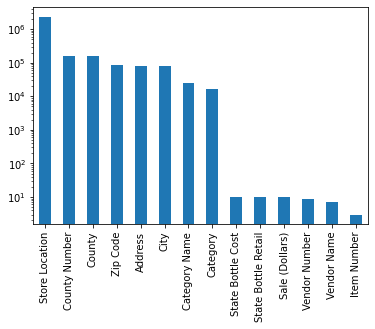

In [51]:
missingvals = df.isnull().sum()
missingvals = missingvals[missingvals > 0]
missingvals.sort_values(inplace=True, ascending = False)
missingvals.plot.bar()

plt.yscale("log")

## Missing value percentage
- None of the columns are missing over 40% of data -> don't need to drop any columns

In [52]:
null_counts = df.isnull().sum() / df.shape[0] * 100
null_counts[null_counts > 0].sort_values(ascending=False) 

Store Location         9.868192
County Number          0.666338
County                 0.666330
Zip Code               0.374281
Address                0.340398
City                   0.340394
Category Name          0.106264
Category               0.072034
State Bottle Cost      0.000042
State Bottle Retail    0.000042
Sale (Dollars)         0.000042
Vendor Number          0.000038
Vendor Name            0.000030
Item Number            0.000013
dtype: float64